# The objective of the project is to learn how to implement a simple image classification
pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this
assignment are as follows:
● Understand the basic Image Classification pipeline and the data-driven
approach (train/predict stages)
● Data fetching and understand the train/val/test splits.
● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5
points)
● Print the classification metric report (2.5 points)
● Implement and apply a deep neural network classifier including (feedforward
neural network, RELU activations) (5 points)
● Understand and be able to implement (vectorized) backpropagation (cost
stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)
● Implement batch normalization for training the neural network (2.5 points)
● Understand the differences and trade-offs between traditional and NN
classifiers with the help of classification metrics (5 points) 

In [8]:
# imports
import pandas as pd
import numpy as np
import tensorflow as tf
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
!pip install -U tensorflow --quiet



     |████████████████████████████████| 86.3MB 76kB/s 
     |████████████████████████████████| 3.8MB 52.9MB/s 
     |████████████████████████████████| 450kB 30.2MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.


In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:


# loading & understanding data
h5f = h5py.File("/content/drive/My Drive/project_data/R7_NNDL_Project2/SVHN_single_grey1.h5",'r')
#h5f = h5py.File('SVHN_single_grey1.h5', 'r') # opened as read only

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# Close the file
h5f.close()

In [11]:
print("shape of train features",x_train.shape)
print("shape of train labels",y_train.shape)
print("shape of test features",x_test.shape)
print("shape of test labels",y_test.shape)

shape of train features (42000, 32, 32)
shape of train labels (42000,)
shape of test features (18000, 32, 32)
shape of test labels (18000,)


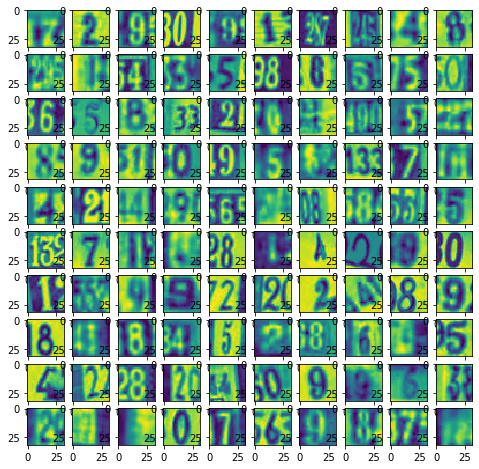

In [12]:
# visualising first few images 
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Data processing / reshaping to fit to KNN

In [0]:
# Data normalisation
x_train /= 255
x_test /= 255

In [14]:
# Flatening the input data from 32*32 to 1024 to fit to KNN model
train_sample_rows = x_train.shape[0]
x_tr = []
for i in range(train_sample_rows):
    x_tr.append(x_train[i,:].flatten())

test_sample_rows = x_test.shape[0]
x_te = []
for i in range(test_sample_rows):
    x_te.append(x_test[i,:].flatten())


print("shape of new training data set after flattening",len(x_tr),len(x_tr[0]))
print("shape of new test data set after flattening",len(x_te),len(x_te[0]))

shape of new training data set after flattening 42000 1024
shape of new test data set after flattening 18000 1024


In [15]:
# KNN implementation
NN = KNeighborsClassifier(n_neighbors = 9)
NN.fit(x_tr, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [16]:
NN.score(x_te,y_test)

0.5124444444444445

In [0]:
# classification metric 

# Deep neural network implementation

In [0]:
# Converting labels to categorical variables 
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [19]:
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add hidden lapyers
model.add(tf.keras.layers.Dense(200, activation='relu'))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(80, activation='relu'))

model.add(tf.keras.layers.Dense(60, activation='relu'))

model.add(tf.keras.layers.Dense(30, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_6 (Dense)              (None, 200)               205000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_9 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_10 (Dense)             (None, 30)               

In [20]:
model.fit(x_train,trainY,validation_data=(x_test,testY),epochs=30,batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 7s 168us/sample - loss: 2.0771 - acc: 0.2497 - val_loss: 1.5949 - val_acc: 0.4567
Epoch 2/30
42000/42000 [==============================] - 6s 152us/sample - loss: 1.3190 - acc: 0.5727 - val_loss: 1.1157 - val_acc: 0.6532
Epoch 3/30
42000/42000 [==============================] - 6s 152us/sample - loss: 1.0409 - acc: 0.6709 - val_loss: 0.9560 - val_acc: 0.7041
Epoch 4/30
42000/42000 [==============================] - 6s 153us/sample - loss: 0.9152 - acc: 0.7119 - val_loss: 0.8908 - val_acc: 0.7271
Epoch 5/30
42000/42000 [==============================] - 6s 153us/sample - loss: 0.8298 - acc: 0.7391 - val_loss: 0.7747 - val_acc: 0.7661
Epoch 6/30
42000/42000 [==============================] - 6s 152us/sample - loss: 0.7827 - acc: 0.7543 - val_loss: 0.7433 - val_acc: 0.7789
Epoch 7/30
42000/42000 [==============================] - 6s 150us/sample - loss: 0.7322 - acc: 0.7690 - val_l